Week 4, Assignment C1:

CAPM and Modern Portfolio Theory in Python

In this notebook, we will study Modern Portfolio Theory in Python.
Please complete the lines bellow where you see "# TODO".

In [63]:
#Objective 1.
#Use this cell to import Numpy (as np) and Pyplot (from Matplotlib as plt) packages.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
#Objective 2.
#Select a number of asset classes ( > 1 ) and a number of observations ( > 500 ).  Store your chosen values to the
#two new variables "no_of_asset_classes" and "no_of_observations", respectively.

#like A,B,C stocks
no_of_asset_classes = 3
#600 rows
no_of_observations = 600

In [65]:
np.random.seed(123)
matrix_of_return_values = np.random.randn(no_of_asset_classes, no_of_observations)

#Objective 3.
#Select a number of test portfolios to generate ( > 1,000 < 20,000).  Store your chosen value to the new variable
#"no_of_portfolios".  

no_of_portfolios = 2000

In [66]:
#Objective 4.
#Initialize four empty lists called "collection_of_random_asset_weights", "portfolio_means",
#"portfolio_standard_deviations", and "portfolio_sharpe_ratios", respectively.

collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

In [67]:
#Objective 5.
#Write a function called "get_random_asset_weights" that takes as input (Input.I) any number of asset classes
#"no_of_asset_classes" and returns (Output.I) a Numpy vector (matrix) of weights (percentages) of length "no_of_asset_classes"
#whose sum is one (1).

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    #random_asset_weights /=np.sum(random_asset_weights)
    random_asset_weights=random_asset_weights / random_asset_weights.sum()
    return random_asset_weights
print(get_random_asset_weights(no_of_asset_classes)) 

[0.07941547 0.24540428 0.67518025]


In [70]:
#Objective 6.
#Write a function called "get_portfolio_statistics" that takes as input (Input.I) a Numpy vector (matrix)
#"asset_weights" of weights (percentages) whose sum is one (1) and (Input.II) a Numpy matrix of return values
#"matrix_of_return_values" whose first axis length is the same as the length of the Numpy vector (matrix)
#"asset_weights" and returns (Output.I) the mean "portfolio_mean", (Output.II) the standard deviation
#"portfolio_standard_deviation", and (Output.III) the Sharpe ratio "portfolio_sharpe_ratio" of the portfolio of
#assets with asset weights "asset_weights" and asset return values belonging to "matrix_of_return_values".
portfolio_mean=0
portfolio_standard_deviation=0
portfolio_sharpe_ratio=0
def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = asset_means.cov()
    portfolio_mean = asset_covariances.mean()
    #portfolio_mean = #todo second line if needed.
    portfolio_standard_deviation = asset_covariances.std()
    #portfolio_standard_deviation = #todo second line if needed.
    portfolio_sharpe_ratio =portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio
print(get_random_asset_weights(no_of_asset_classes),matrix_of_return_values)

[0.10719874 0.42210617 0.47069509] [[-1.0856306   0.99734545  0.2829785  ... -1.39437511  0.91268794
  -1.27357024]
 [ 1.14065624 -0.78816556  0.26523396 ... -0.2699179  -0.87632674
  -1.42521096]
 [ 1.11170175  0.18095715  1.33280094 ... -0.14641577  1.16017595
  -0.64151234]]


In [72]:
#Objective 7.
#Using the functions constructed in Objectives 5 and 6, write a loop that, on each iteration, determines a
#Numpy vector (matrix) of weights (percentages) "random_asset_weights" of length "no_of_asset_classes" whose sum 
#is one (1) and then appends to each of the lists "collection_of_random_asset_weights", "portfolio_means",
#"portfolio_standard_deviations", and "portfolio_sharpe_ratios" the Numpy vector (matrix) of weights (percentages)
#"random_asset_weights"; and the mean "portfolio_mean", the standard deviation "portfolio_standard_deviation", and
#the Sharpe ratio "portfolio_sharpe_ratio" of the portfolio of assets with asset weights "asset_weights" and asset 
#return values belonging to "matrix_of_return_values", respectively.

while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    portfolio_means.append(np.array(portfolio_mean))
    portfolio_standard_deviations.append(np.array(portfolio_standard_deviation))
    portfolio_sharpe_ratios.append(np.array(portfolio_sharpe_ratio))

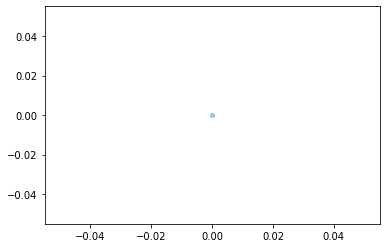

In [73]:
#Objective 8.
#Make a scatterplot of the corresponding values (x,y) = (portfolio_standard_deviation, portfolio_mean) from the
#lists "portfolio_standard_deviations" and "portfolio_means", respectively.

plt.plot(portfolio_means, portfolio_standard_deviations, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

In [74]:
#Objective 9.
#Find the list index of the portfolio of highest Sharpe ratio.

index = portfolio_sharpe_ratio

In [75]:
#Objective 10.
#Print the asset weights and Sharpe ratio of the portfolio of highest Sharpe ratio, using index above.

#print(#todo)
#print(#todo)

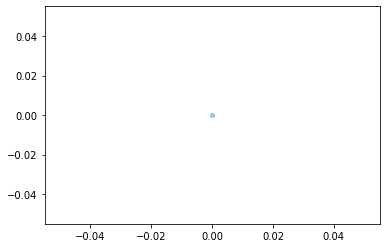

In [76]:
#Objective 11.
#Add the Capital Market Line to your scatterplot from Objective 8.

x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot(portfolio_means, portfolio_standard_deviations, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.show()

In [ ]:
#Objective 12.
#All of the work in this notebook assumes a risk-free rate of zero (0.00).  How could this work be modified to
#accommodate a nonzero risk-free rate?  Explain.

-- Please write Your Answer Here --